# layers

> The layers of NN

In [ ]:
#| default_exp nn.layers

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt

from fastcore.basics import patch

#| hide

## Working of forward pass for nn layer.

Use matrix multiplication for the inputs and weights for the respective dot products for each neuron weights and the inputs to get the `weighted sum`

In [ ]:
#| hide
# Define a batch of inputs matrix
i = np.array(([1, 2], [1, 2], [1, 2]))

"""Define a weights matrix where each row correspond to weights for each neuron.
    Which has shape of (num of neurons, output neurons)"""
w = np.array([[1, 2], [3, 4], [5, 6]]) 

# Biases for each neuron
b = np.array([2, -1, 3])

# Multiply the vector with the transpose of the matrix
result = np.matmul(i, w.T) + b
result

array([[ 7, 10, 20],
       [ 7, 10, 20],
       [ 7, 10, 20]])

## Fully connected layers

These layers allow use to have neurons of on layer connected to other layer without any breaks. Most widely used.

In [ ]:
#| export
class Dense:
    "Fully connected layer"
    def __init__(
            self, 
            in_features: int, # The number of features.
            out_features: int # The number of neurons to have for the layer.
        ):
        
        self.in_features = in_features
        self.out_features = out_features
        self.weights = np.random.randn(out_features, in_features) # each row are the weigths for each neuron.
        self.biases = np.random.randn(out_features)
        
    def __str__(self):
        return f"Dense(in_features={self.in_features}, out_features={self.out_features})"
    
    __repr__ = __str__

#### Example
A layer can be created by

In [ ]:
layer = Dense(5, 3)
layer

Dense(in_features=5, out_features=3)

layer parameters can be accessed by `layer.weigths` and `layer.biases` variables

In [ ]:
#| export
@patch
def forward(
        self: Dense,
        X: np.ndarray # shape of (batch_size, in_features) if a single batch is passed it has to be of shape (1, in_features).
    ) -> np.ndarray: # the output of the layer
    "Forward input `X` through the layer"
    
    self.output = np.matmul(X, self.weights.T) + self.biases
    
    return self.output

#### Example
Data can be passed through with

In [ ]:
X = [[2.0, 3.0, 4.0, 5.0, 6.0]] # of shape (1, 5)
layer.forward(X)

layer.output

array([[ 8.47999191, -6.8053504 , -3.19016013]])

and output can be accessed by `layer.output` variable after the forward pass 

## Data generators

Artifical data generators can be usefull for quick testing and debuging purposes.

In [ ]:
#| export
def spiral_data(
        samples: int=100, # number of points per class
        classes: int=3, # number of classes
        noice_fact=None # add noice to the spiral angles.
    ) -> tuple[np.ndarray, np.ndarray]: # X and y arrays's
    "Create a 2D spiral for each class"
    
    N = samples 
    D = 2 # dimensionality
    C = classes  

    X = np.zeros((N*C,D)) # data matrix (each row = single example)
    y = np.zeros(N*C, dtype='uint8') # class labels

    for j in range(C):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2 # theta
        
        if noice_fact: t *= noice_fact # scale the angle
        
        X[ix] = np.stack((r*np.sin(t), r*np.cos(t)), axis=-1)
        y[ix] = j
    
    return X, y

This code is inspired by this [course](https://cs231n.github.io/neural-networks-case-study/#data)

#### Example

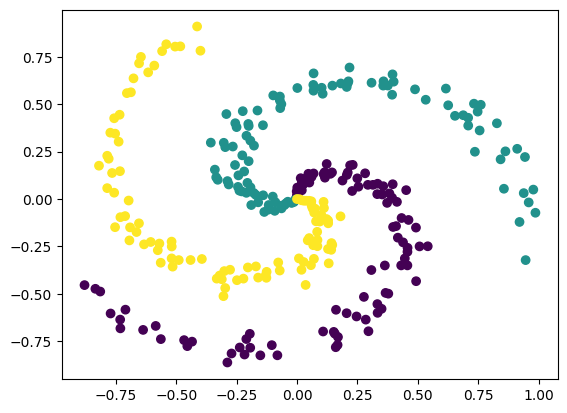

In [ ]:
X, y = spiral_data()

# Test for number of data points.
assert (X.shape[0] == 100 * 3) and (y.shape[0] == 100 * 3)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

we can see three spirals, now increase the noice in the angles

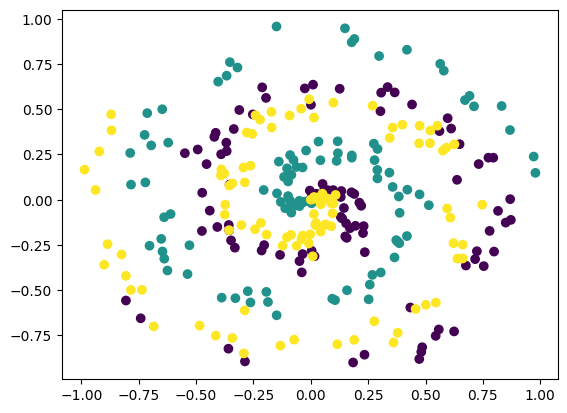

In [ ]:
X, y = spiral_data(noice_fact=2.5)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Example usage
Make data with `researchai.nn.layers.spiral_data` and plot it

Add some noice to spirals by increasing the noice_fact

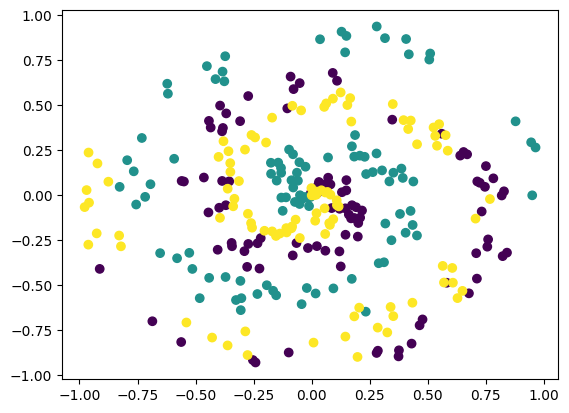

In [ ]:
X, y = spiral_data(noice_fact=2.5)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Create a `researchai.nn.layers.Dense` layer and forward pass through it

In [ ]:
dense = Dense(2, 3)

dense.forward(X)[:5]

array([[-0.32104264, -0.86396488, -2.12740994],
       [-0.32975848, -0.86461072, -2.13622016],
       [-0.34353207, -0.86936126, -2.14830142],
       [-0.34610823, -0.87912212, -2.14618081],
       [-0.36716138, -0.88181375, -2.16690324]])

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()